In [31]:
import pandas as pd
import numpy as np
import seaborn as sn

In [32]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Social_Network_Ads.csv'

In [33]:
data = pd.read_csv(path)

In [34]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
data = data.drop('User ID', axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [37]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
data.Gender = le.fit_transform(data.Gender)

In [40]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [41]:
data.shape

(400, 4)

In [42]:
data.duplicated().sum()

20

In [43]:
data = data.drop_duplicates()

In [44]:
data.shape


(380, 4)

In [45]:
x = data.drop('Purchased' , axis=1)
y = data[['Purchased']]

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

In [47]:
model  = DecisionTreeClassifier()

In [48]:
cv = ShuffleSplit(n_splits=100 , random_state = 42)

In [63]:
t_size = train_sizes=np.linspace(0.1, 1.0, 10) 
t_size

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [64]:
train_sizes ,train_scores,test_scores = learning_curve(
model, x, y, cv=cv, scoring='accuracy', train_sizes=t_size)

In [65]:
train_scores_mean = np.mean(train_scores , axis=1)
test_scores_mean = np.mean(test_scores , axis = 1)

In [66]:
train_scores_mean

array([0.99941176, 0.99941176, 0.99941176, 0.99904412, 0.99888889,
       0.99868293, 0.99841004, 0.99831502, 0.99788274, 0.99777778])

In [67]:
test_scores_mean

array([0.82894737, 0.83184211, 0.84289474, 0.84710526, 0.85184211,
       0.85315789, 0.84657895, 0.85026316, 0.84552632, 0.84368421])

In [68]:
from matplotlib import pyplot as plt

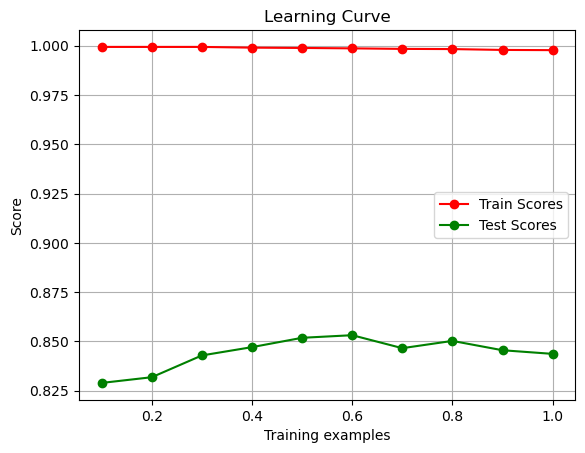

In [71]:
plt.plot(t_size , train_scores_mean , marker='o',color = 'r' , label = 'Train Scores')
plt.plot(t_size , test_scores_mean ,marker='o',color = 'g' , label = 'Test Scores' )
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
